<a href="https://colab.research.google.com/github/Amoghakrao/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Amogha_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing Libraries , Mounting Dirve and Loading Data set from Drive**

In [1]:
# Improting required libraries
import pandas as pd
import numpy as np

# Importing Visualization  libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing date class
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing for model building 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing

# Importing for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing for handling warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# LOAD SEOLBIKE DATA SET FROM DRIVE
bike_df = pd.read_csv("/content/drive/MyDrive/Bike Sharing Demand Prediction - Amogha K/SeoulBikeData.csv",encoding = 'unicode_escape')

# **Overview of Data**

In [4]:
#overview of Data set
bike_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
#Top 5 rows of data set
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Bottom 5 rows of data set
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# All columns of Data set
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
print(f' The shape of dataset is {(bike_df.shape)} \n Total Rows are : {(bike_df.shape)[0]}\n Total Columns are : {(bike_df.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec



*   **This is one year data set of one year 2017-2018 of souel bike sharing prediction.**
* **This data set has 8760 lines and 14 colums.**



In [10]:
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [11]:
# Missing data counts
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **Missing values: The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values, and as we can see above, there are no missing values present in the dataset.**

In [12]:
# checking unique values 
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [13]:
d_value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is =",d_value)

The number of duplicate values in the data set is = 0


In [14]:
# Total number of rented bikes
print('Total Rented Bike Count:', bike_df['Rented Bike Count'].sum())

Total Rented Bike Count: 6172314


In [15]:
bike_df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [16]:
bike_df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [17]:
bike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

# **Pre-Processing and Exploratory Data Analysis of data set**

In [18]:
# Changing the column name for easy handling
bike_df = bike_df.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'wind speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew point temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation ',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall '})
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [19]:
from datetime import datetime
import datetime as dt

In [20]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x:
                                        dt.datetime.strptime(x,"%d/%m/%Y"))

In [21]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [22]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x :
                                                 1 if x=='Saturday' or x=='Sunday' else 0 )

In [23]:
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* **Python reads the Date column as a string, so we converted it into 3 columns, that is, year, month, and day for further analysis.**

In [24]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [25]:
bike_df.head()

,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [26]:
#converting 'hour','month''weekdays_weekend' columns into categorical data .

cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

bike_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented Bike Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   wind speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew point temperature  8760 non-null   float64 
 7   Solar Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

* **"Hour","month","weekdays_weekend" columns are shown as an integer data type, but actually they are a category data type. So we need to change this data type for further analysis and correlation with this. Then the values are not actually true, so we can be misled by this.**


1. **Analysis on Categorical Data**



[Text(0.5, 1.0, 'Count of Rented bikes according to Month')]

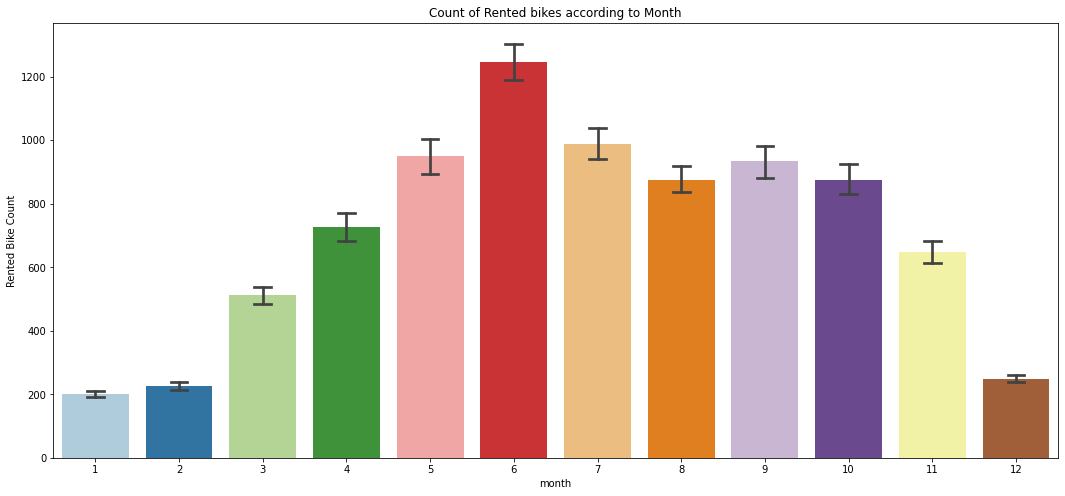

In [27]:
#anlysis the data by vizualisation
fig,ax=plt.subplots(figsize=(18,8))
sns.barplot(data=bike_df,x='month',y='Rented Bike Count',ax=ax,capsize=.2 , palette = "Paired")
ax.set(title='Count of Rented bikes according to Month')

* **When compared to other months, the demand for rented bikes is highest from month 5 to month 10. These months come during the summer season.**

[Text(0.5, 1.0, 'Count of Rented bikes according to Weekdays and Weekend')]

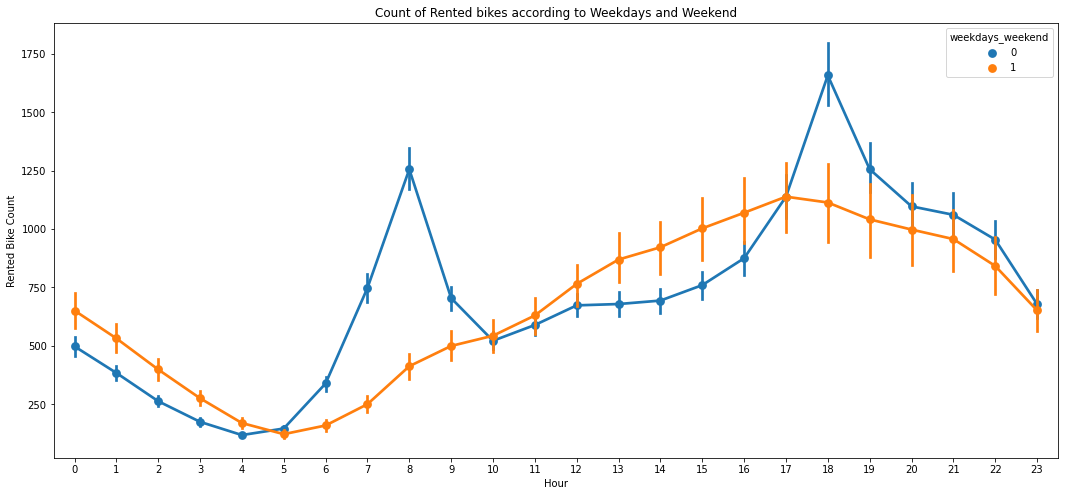

In [28]:
#anlysis the data by vizualisation
fig,ax=plt.subplots(figsize=(18,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes according to Weekdays and Weekend')

* **From this graph we observe that people are using rented bikes between 7AM and 9AM AND 5PM and 7PM. That means they use bikes for reaching their offices.**
* **The graph shows the week days, which are represented in blue, showing that the demand for the bike is higher because of the office.**


[Text(0.5, 1.0, 'Count of Rented bikes according to Seasons ')]

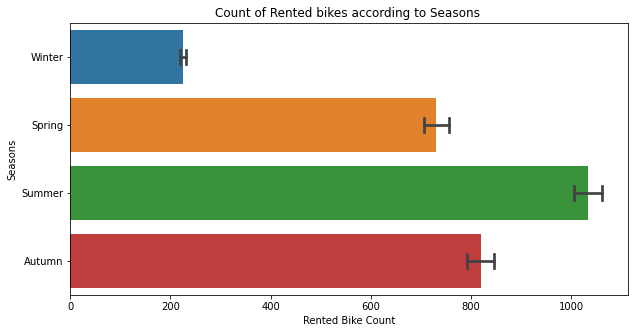

In [29]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=bike_df,x='Rented Bike Count',y='Seasons',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Seasons ')

* **People use rented bikes heavily in the summer season and less in the winter season because of snowfall.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

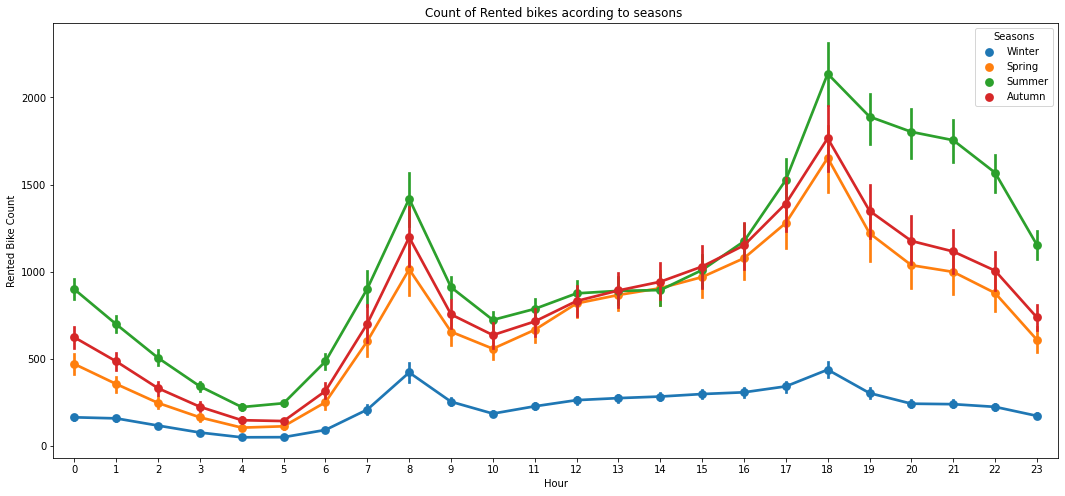

In [30]:
#anlysis the  data by vizualisation
fig,ax=plt.subplots(figsize=(18,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

* **By the above analysis, we can say that people use high rented bikes normally from 7 AM–9 PM and 5 PM–7 PM in all the seasons because of office hours.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to  Functioning Day')]

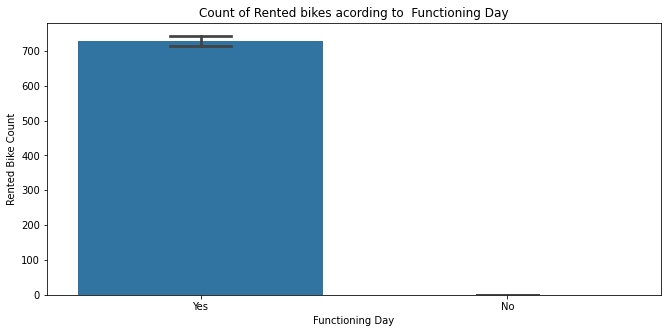

In [31]:
fig,ax=plt.subplots(figsize=(11,5))
sns.barplot(data=bike_df,x= 'Functioning Day',y='Rented Bike Count',ax=ax,capsize= .2)
ax.set(title='Count of Rented bikes acording to  Functioning Day')

* **The above graph shows clearly that people will use only rented bikes on functioning days and not on non-functioning days.**

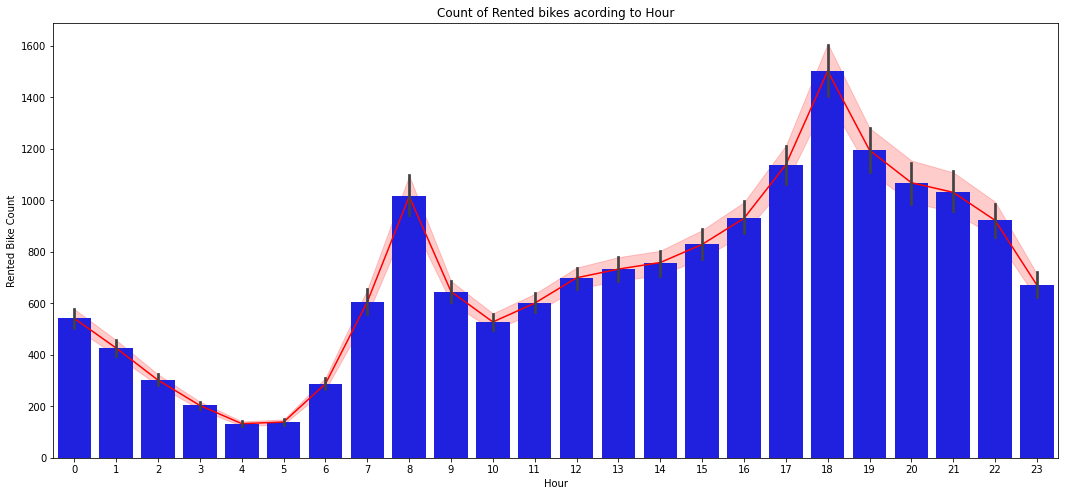

In [32]:
# bar plot between Hour and rented bike count
plt.figure(figsize=(18,8))
sns.lineplot(x = bike_df['Hour'],y = bike_df['Rented Bike Count'],color="r")
sns.barplot(x = bike_df['Hour'],y = bike_df['Rented Bike Count'], color="b")
plt.title('Count of Rented bikes acording to Hour')
plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

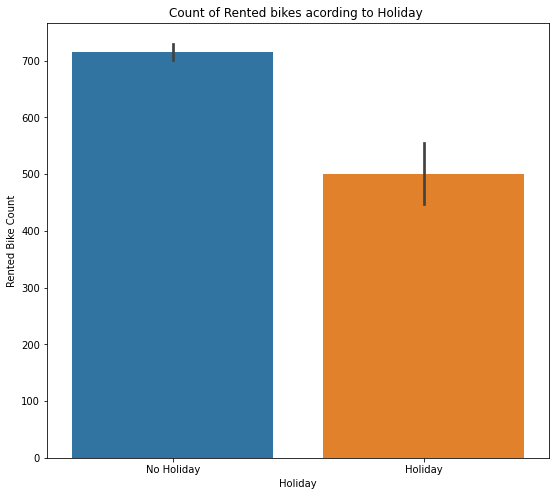

In [33]:
fig,ax=plt.subplots(figsize=(9,8))
sns.barplot(data=bike_df,x='Holiday',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

* **People will use fewer rented bikes on holiday days compared to non-holiday days**

2. **Analysing Numeric data**


In [34]:
numerical_columns = list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation ', 'Rainfall',
       'Snowfall '],
      dtype='object')

<Figure size 720x432 with 0 Axes>

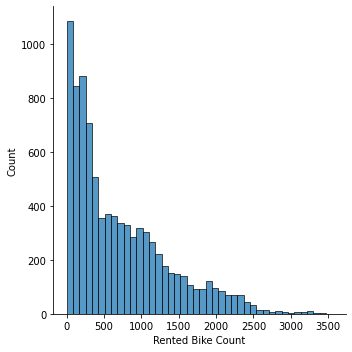

<Figure size 720x432 with 0 Axes>

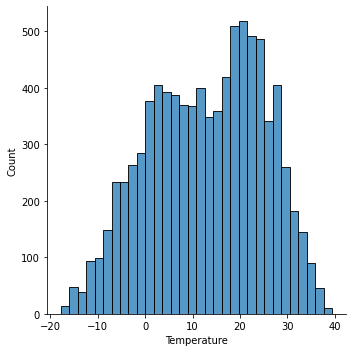

<Figure size 720x432 with 0 Axes>

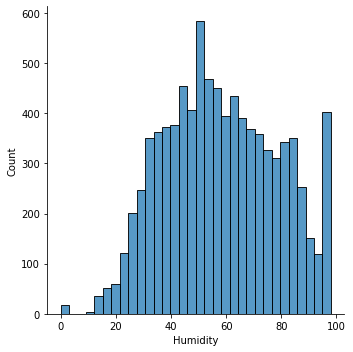

<Figure size 720x432 with 0 Axes>

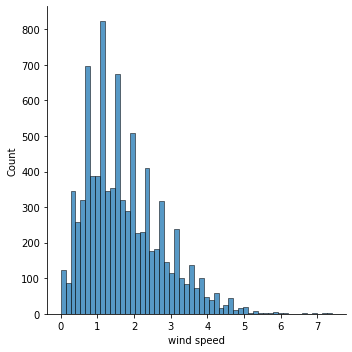

<Figure size 720x432 with 0 Axes>

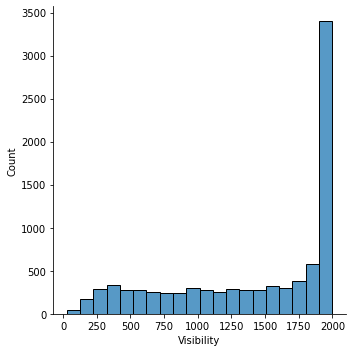

<Figure size 720x432 with 0 Axes>

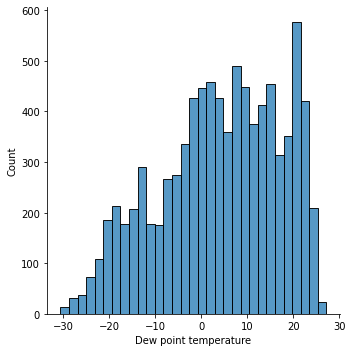

<Figure size 720x432 with 0 Axes>

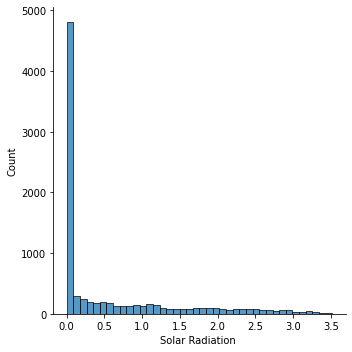

<Figure size 720x432 with 0 Axes>

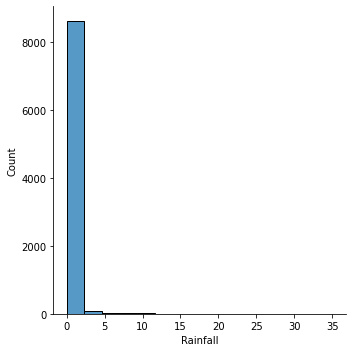

<Figure size 720x432 with 0 Axes>

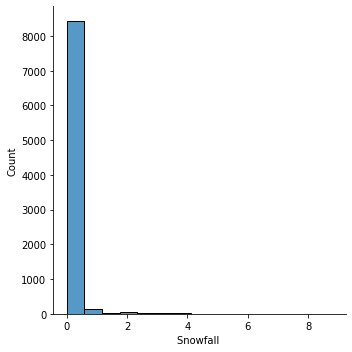

In [35]:
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.displot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

### **Print the plot to analyse the relationship between "Rented Bike Count"**

Text(0.5, 1.0, 'Rented Bike Count V/s Temperature')

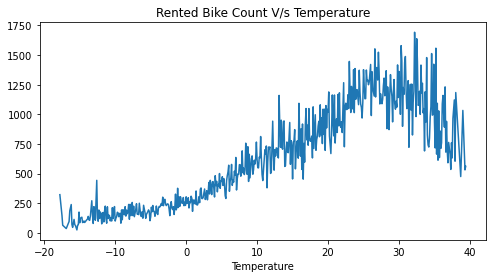

In [36]:
plt.figure(figsize=(8,4))
bike_df.groupby('Temperature').mean()['Rented Bike Count'].plot()
plt.title("Rented Bike Count V/s Temperature")


* **From the above plot, people like to ride bikes when it is pretty hot, around 25°C on average.**

Text(0.5, 1.0, 'Rented Bike Count V/s Dew point temperature')

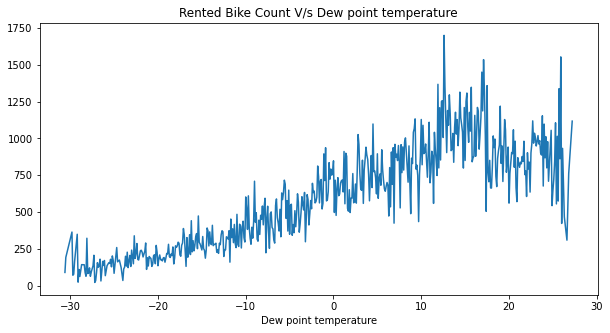

In [37]:
plt.figure(figsize=(10,5))
bike_df.groupby('Dew point temperature').mean()['Rented Bike Count'].plot()
plt.title("Rented Bike Count V/s Dew point temperature")

* **"Dew point temperature" is almost same as the 'temperature' there is some similarity present we can check it in our next step.**

Text(0.5, 1.0, 'Rented Bike Count V/s Solar Radiation ')

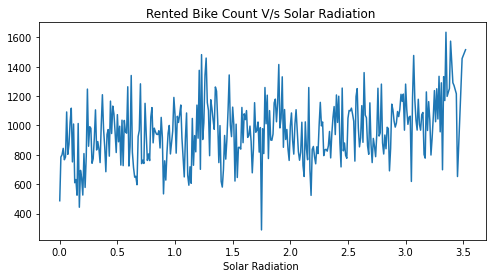

In [38]:
plt.figure(figsize=(8,4))
bike_df.groupby('Solar Radiation ').mean()['Rented Bike Count'].plot()
plt.title("Rented Bike Count V/s Solar Radiation ")

* **The number of rented bikes is huge. When there is solar radiation, the counter of rented bikes is around 1000.**

Text(0.5, 1.0, 'Rented Bike Count V/s Snowfall ')

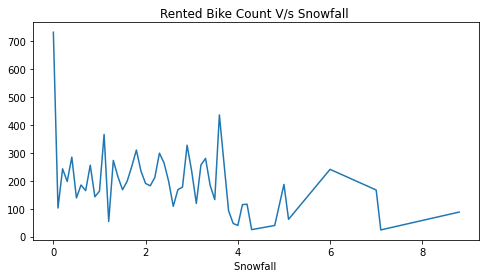

In [39]:
plt.figure(figsize=(8,4))
bike_df.groupby('Snowfall ').mean()['Rented Bike Count'].plot()
plt.title("Rented Bike Count V/s Snowfall ")

* **From the plot, on the y-axis, the number of rented bikes is very low The bike rentals are much lower when we have more than 4 cm of snow.**

Text(0.5, 1.0, 'Rented Bike Count V/s Rainfall')

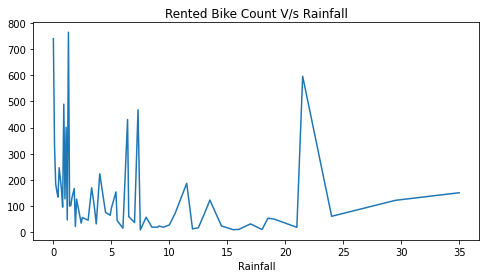

In [40]:
plt.figure(figsize=(8,4))
bike_df.groupby('Rainfall').mean()['Rented Bike Count'].plot()
plt.title("Rented Bike Count V/s Rainfall")

* **The demand for rented bikes is not decreasing. Here, for example, even if we have 20 mm of rain, there is a big peak for rented bikes.**

Text(0.5, 1.0, 'Rented Bike Count V/s wind speed')

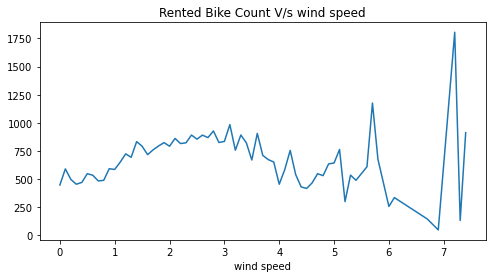

In [41]:
plt.figure(figsize=(8,4))
bike_df.groupby('wind speed').mean()['Rented Bike Count'].plot()
plt.title("Rented Bike Count V/s wind speed")

* **The demand for rented bikes is uniformly distributed regardless of wind speed, but when the wind speed is 7 m/s, the demand for bikes increases, indicating that people enjoy riding bikes when it's a little windy.**

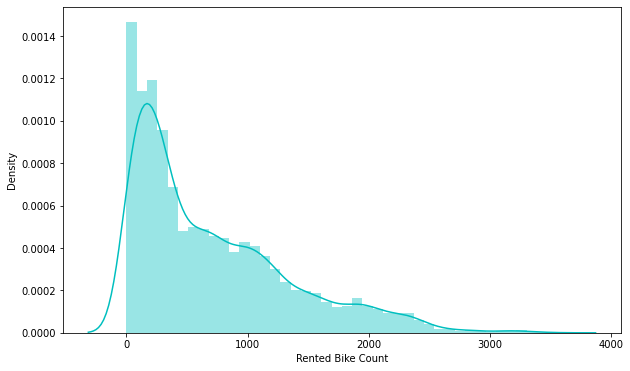

In [42]:
#Distribution plot of Rent Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented Bike Count'],hist=True ,color="c")

* **The above graph shows that Rent Bike Count has moderate right skewness. Because the assumption of linear regression is that the dependent variable's distribution must be normal, we must perform some operation to normalise it.**

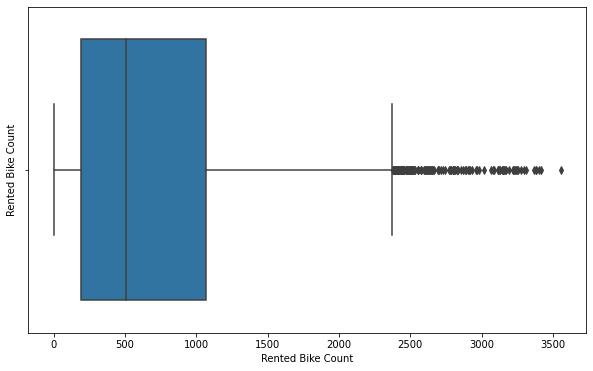

In [43]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=bike_df['Rented Bike Count'])
plt.show()

* **By the above visualization, we can see there are many outliers. We have to remove it for further analysis.**

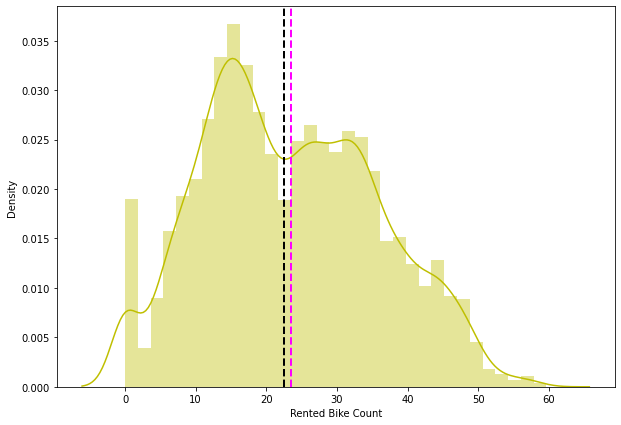

In [44]:
plt.figure(figsize=(10,7))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* **Applying square root to the skewed Rented Bike Count, here we get an almost normal distribution.**

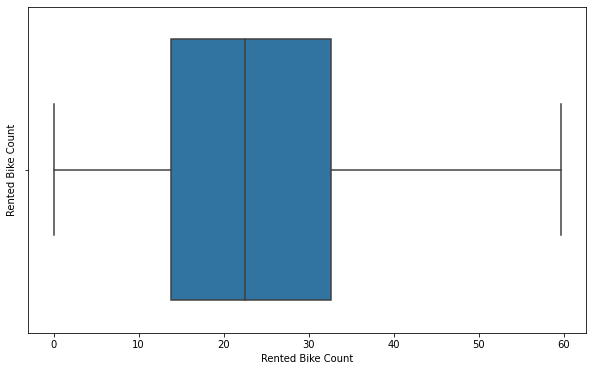

In [45]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(bike_df['Rented Bike Count']))
plt.show()

* **After normalizing, the column outliers are also eliminated.**

## **REGRESSION PLOT**

**A regression model that describes the relationship between one response variable and one or more explanatory variables by calculating the best-fitting linear line (or plane).**

**Regression analysis is a statistical method to model the relationship between dependent (target) and independent (predictor) variables with one or more independent variables. More specifically, regression analysis helps us to understand how the value of the dependent variable changes corresponding to an independent variable when other independent variables are held fixed. It predicts continuous or real values such as temperature, age, salary, price, etc.**

In [46]:
rgb_values = sns.color_palette("bright")
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

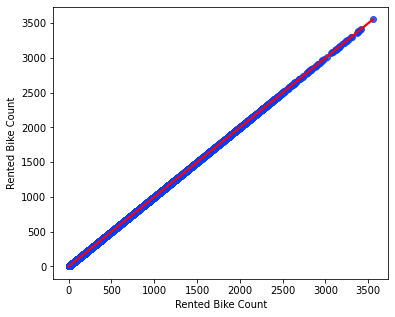

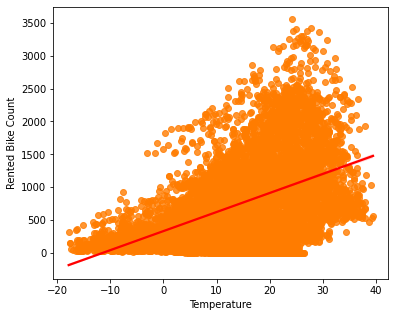

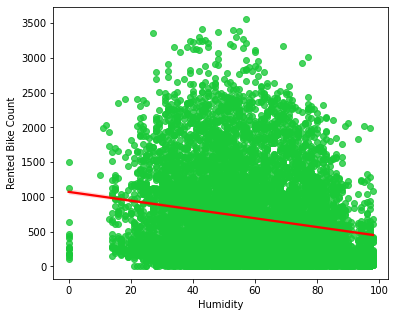

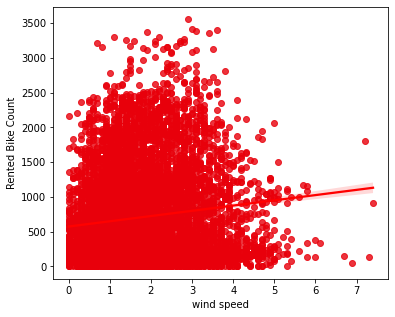

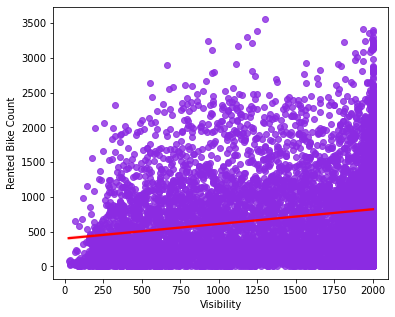

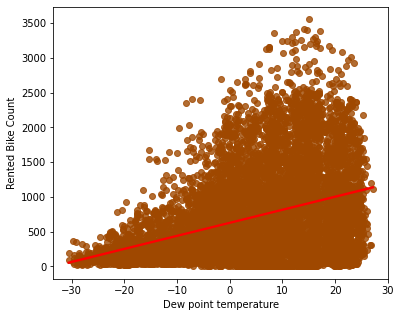

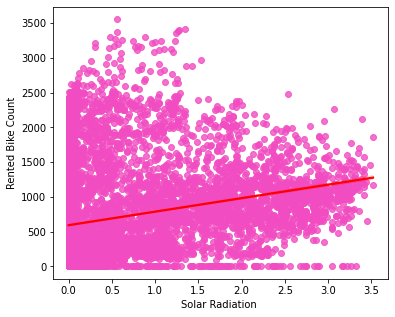

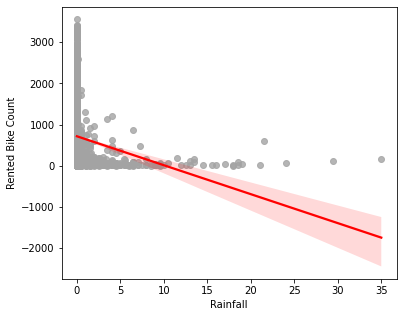

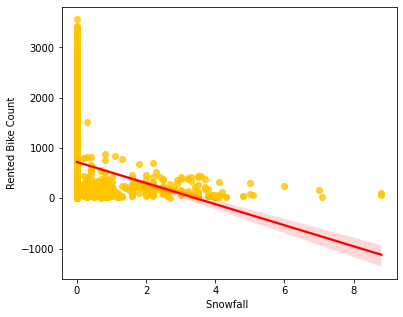

In [47]:
plt.rcParams['figure.figsize'] = (6,5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_df[col], y = bike_df['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

* **Regression plot of numerical feature 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation 'are  bike count increses with these features**

* **'Rainfall' ,'Snowfall', and 'Humidity'. These features are negatively related to the rented bike count, which means the rented bike count decreases when these features increase.**

## **Multivariate Analysis**

**Multivariate analysis is used to describe analyses of data where there are multiple variables or observations for each unit or individual.**

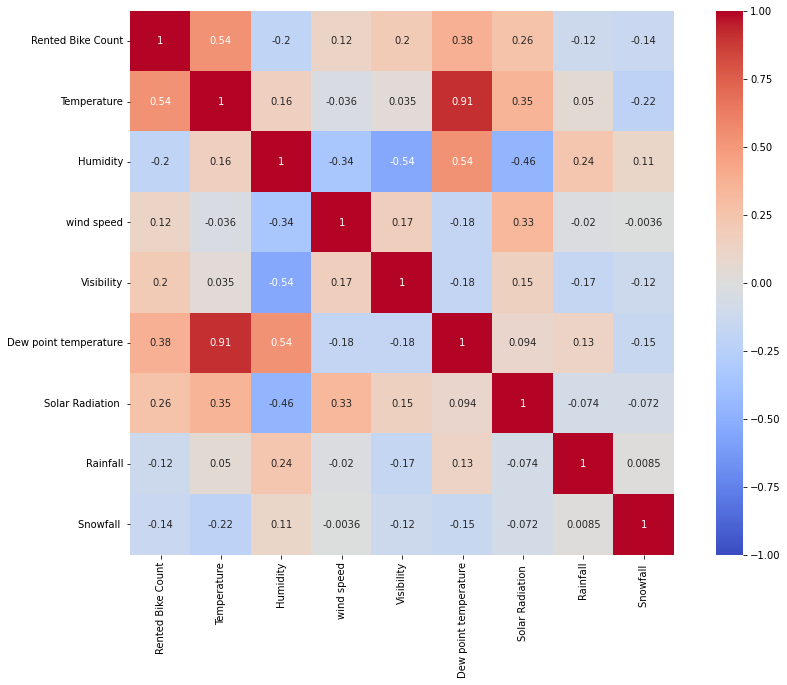

In [48]:
 #plotting correlation Heat map
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

* **Highly correlated**

    the temperature

    the dew point temperature

    the solar radiation

    Negatively correlated

    Humidity Rainfall

**From the above correlation heatmap, we see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature', i.e. 0.91, so even if we drop this column, it does not affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature.**

,Temperature,Dew point temperature
Temperature,1.000000,0.912798
Dew point temperature,0.912798,1.000000


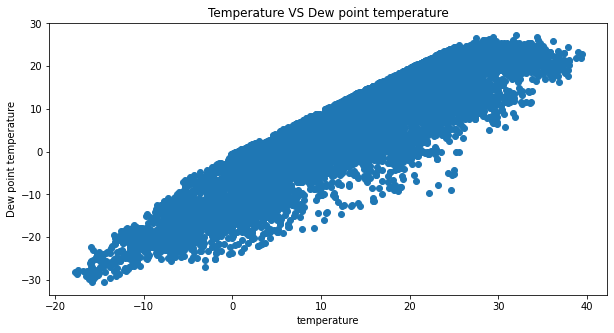

In [49]:
# Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(10,5))
plt.scatter(x='Temperature',y='Dew point temperature',data=bike_df)
plt.xlabel('temperature')
plt.ylabel('Dew point temperature')
plt.title('Temperature VS Dew point temperature')

#correlation between temp. and Dew point temperature
bike_df[['Temperature','Dew point temperature']].corr()

In [50]:
#drop the Dew point temperature column
bike_df=bike_df.drop(['Dew point temperature'],axis=1)

# **LABEL ENCODING**

**A dataset may contain various types of values; sometimes it consists of categorical values. So, in order to use those categorical values for programming efficiently, we create dummy variables.**

**Furthermore, many machine learning algorithms cannot work directly with categorical data. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [51]:
#creating dummy variable for ease of operations on categorical features.
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [52]:
# creating a function for encoding

bike_df_copy = bike_df
def encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for i in categorical_features:
    bike_df_copy = encoding(bike_df_copy, i) # deploying the created funtion
bike_df_copy.head()

,Rented Bike Count,Temperature,Humidity,wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


## **Variance Inflation Factor**

In [53]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
calc_vif(bike_df_copy[[i for i in bike_df_copy.describe().columns if i not in ['Rented Bike Count' ,'Seasons_Spring','Seasons_Summer','Seasons_Winter']]])

,variables,VIF
0,Temperature,24.141019
1,Humidity,20.061619
2,wind speed,5.256720
3,Visibility,11.390446
4,Solar Radiation,6.572372
5,Rainfall,1.112059
6,Snowfall,1.169827
7,Hour_1,1.831734
8,Hour_2,1.834467
9,Hour_3,1.837260


In [55]:

bike_df_copy.head()

,Rented Bike Count,Temperature,Humidity,wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **MODEL BUILDING**

In [56]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented Bike Count'])

In [57]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


**Splitting the data to Train and Test: We will now split the data into TRAIN and TEST (80:20 ratio). We will use the train_test_split method from the sklearn package for this.**

In [58]:
# Viewing the data of top 5 rows of variables assigned to X.
X.head()

,Temperature,Humidity,wind speed,Visibility,Solar Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
# Viewing the data of top 5 rows of variables assigned to Y.
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [60]:
bike_df_copy.describe().columns

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'wind speed',
       'Visibility', 'Solar Radiation ', 'Rainfall', 'Snowfall ', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

### **LINEAR REGRESSION**

In [61]:
# Fitting Linear Regression to the Training set
reg= LinearRegression().fit(X_train, y_train)

In [62]:
#score checking 
reg.score(X_train, y_train)

0.7722101548255267

In [63]:
reg.score(X_test, y_test)

0.7893518482962683

In [64]:
#checking the coefficeint
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [65]:
# predicting  train test values.
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

**Evaluating the model on train data**

In [66]:
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189292
RMSE : 5.9226271942350825
MAE : 4.474024092996788
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


In [67]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

**Evaluating the model on test data**

In [68]:
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318181
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


* **The R2 score for the test set is 0.78. This means our linear regression model is performing well on the data.**

In [69]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,4.41,33.275,5.768,0.789,0.78


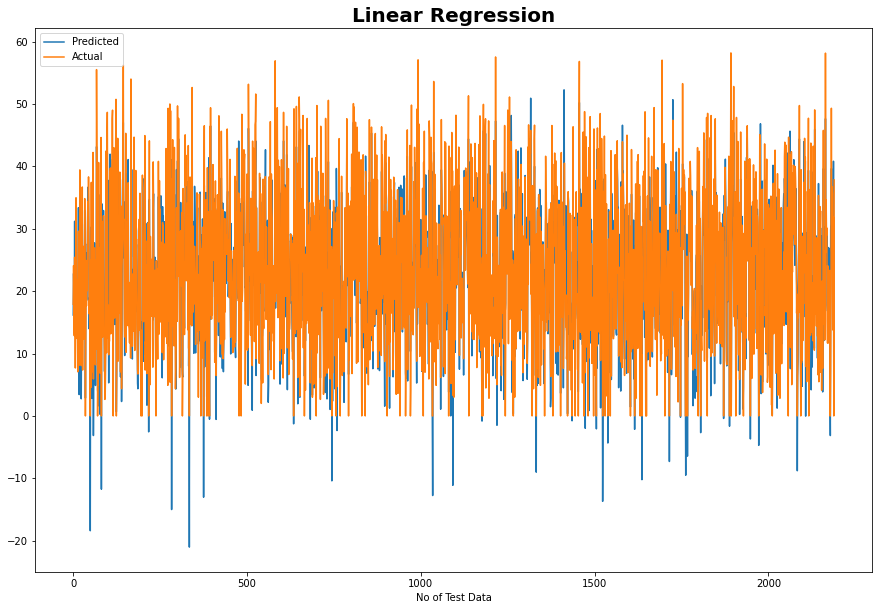

In [70]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.title('Linear Regression',fontsize= 20, fontweight='bold')
plt.show()

### **LASSO REGRESSION**

In [71]:
# Fitting LASSO Regression to the Training set
lasso  = Lasso(alpha= 0.1 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [72]:
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7473037178309577 0.7306322353334551


In [73]:
# predicting  train test values.
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso= lasso.predict(X_test)

**Evaluating the model on train set**


In [74]:
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_l)

MSE : 41.48012492751929
RMSE : 6.440506573827815
MAE : 4.960430531038622
R2 : 0.7306322353334551
Adjusted R2 : 0.7247217381629008


In [75]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,35.078,5.923,0.772,0.77
1,Lasso regression,4.960,41.480,6.441,0.731,0.72


**Evaluating the model on test set**

In [76]:
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 39.91752283290745
RMSE : 6.318031563145871
MAE : 4.91263385826569
R2 : 0.7473037178309577
Adjusted R2 : 0.7417590281661841


In [77]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.410,33.275,5.768,0.789,0.78
1,Lasso regression,4.913,39.918,6.318,0.747,0.74


* **The R2 score for the test set is 0.74. This means our lasso regresion model is performing well on the data.**

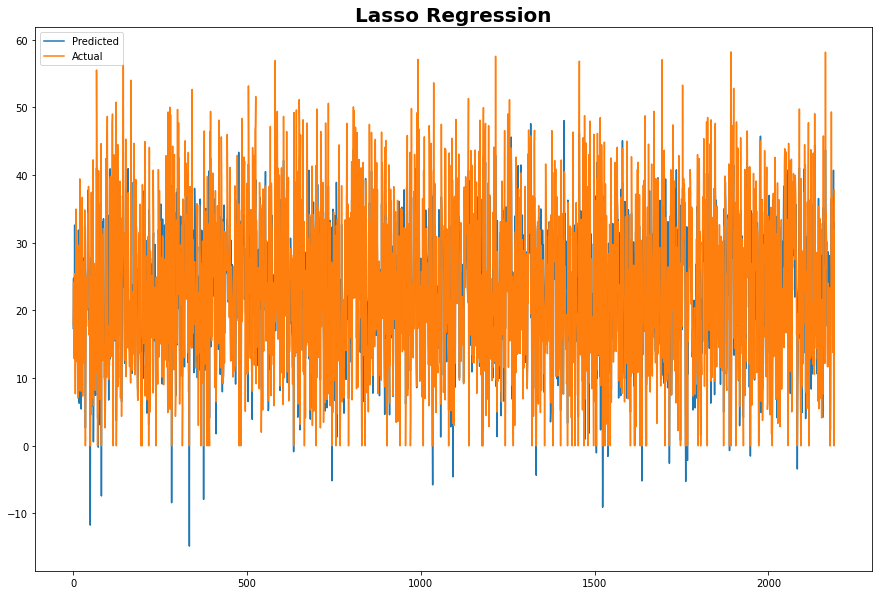

In [78]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Lasso Regression',fontsize= 20, fontweight='bold')
plt.show()

### **RIDGE REGRESSION**

In [79]:
# Fitting RIDGE Regression to the Training set
ridge= Ridge(alpha=0.1, max_iter= 3000)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, max_iter=3000)

In [80]:
#check the score
ridge.score(X_train, y_train)

0.7722100789802107

In [81]:
# predicting  train test values.
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

**Evaluating the model on train data**

In [82]:
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125378
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


In [83]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,35.078,5.923,0.772,0.77
1,Lasso regression,4.960,41.480,6.441,0.731,0.72
2,Ridge regression,4.474,35.078,5.923,0.772,0.77


In [84]:
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.410,33.275,5.768,0.789,0.78
1,Lasso regression,4.913,39.918,6.318,0.747,0.74
2,Ridge regression,4.410,33.277,5.769,0.789,0.78


* **The R2score for the test set is 0.78. This means our Ridge regression model is performing well on the data.**

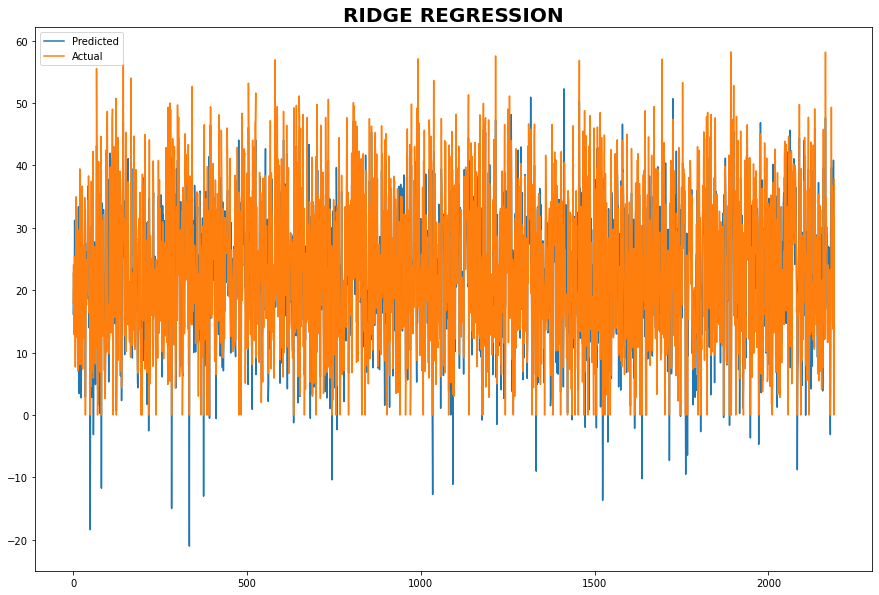

In [86]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('RIDGE REGRESSION',fontsize= 20, fontweight='bold')
plt.show()

### **DECISION TREE**

In [87]:
# We first need to standartize data
scalerTrain = preprocessing.StandardScaler().fit(X_train)

scalerTest = preprocessing.StandardScaler().fit(X_test)

X_train_Scaled=scalerTrain.transform(X_train)

X_test_Scaled=scalerTest.transform(X_test)

In [88]:
# Maximum depth of trees
max_depth = [6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [80,90,100]

# HYperparameter Grid
param_1 = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [89]:
# Hyperparameter tuning

decisionTree = DecisionTreeRegressor()

gridSearch_decisionTree=GridSearchCV(decisionTree,param_1,scoring='r2',cv=10)

gridSearch_decisionTree.fit(X_train_Scaled,y_train)   # Fitting Decision Tree to the Training set

best_DecisionTree=gridSearch_decisionTree.best_estimator_

In [90]:
# predicting  train test values.
y_pred_train_d = best_DecisionTree.predict(X_train_Scaled)
y_pred_test_d= best_DecisionTree.predict(X_test_Scaled)

**Evaluating the model on train set**

In [91]:
#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

#calculate r2 and adjusted r2
r2_d= r2_score((y_train), (y_pred_train_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

MSE : 37.5750579504648
RMSE : 6.12984974942003
MAE : 4.54662831907701
R2 : 0.7559913480246623
Adjusted R2 : 0.727869464554237


In [92]:
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,35.078,5.923,0.772,0.77
1,Lasso regression,4.960,41.480,6.441,0.731,0.72
2,Ridge regression,4.474,35.078,5.923,0.772,0.77
3,Dicision tree regression,4.547,37.575,6.130,0.756,0.73


**Evaluating the model on test set**

In [93]:
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)

#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )

MSE : 42.06449807344293
RMSE : 6.485714923849407
MAE : 4.697733245173592
R2 : 0.7337123769187646
Adjusted R2 : 0.727869464554237


In [94]:
dict2={'Model':'Decision tree test ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df = test_df.append(dict2, ignore_index = True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.410,33.275,5.768,0.789,0.78
1,Lasso regression,4.913,39.918,6.318,0.747,0.74
2,Ridge regression,4.410,33.277,5.769,0.789,0.78
3,Decision tree test,4.698,42.064,6.486,0.734,0.73


* **The R2 score for the test set is 0.73. This means our Decision tree model is performing well on the data.**

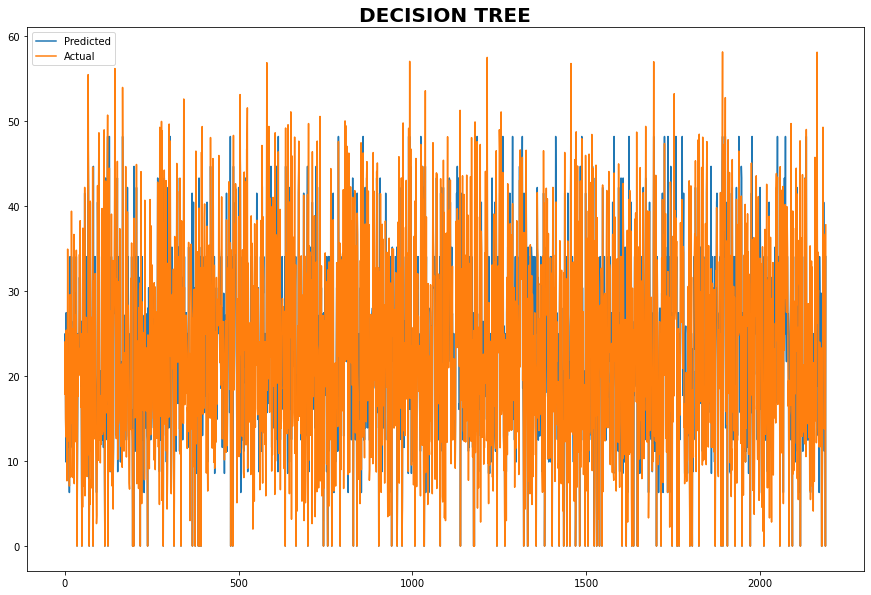

In [95]:
# plotting the actual and predicted values
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.title('DECISION TREE',fontsize= 20, fontweight='bold')
plt.show()

### **RANDOM FOREST**

In [96]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
# Fitting the model
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
# predicting  train test values.
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

**Evaluating the model on train set**

In [98]:
#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#calculate r2 and adjusted r2
r2_rf= r2_score((y_train), (y_pred_train_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Adjusted_R2 :', Adjusted_R2_rf)

MSE : 1.5840229184615142
RMSE : 1.2585797227277715
MAE : 0.7978806586034212
R2 : 0.989713514280101
Adjusted_R2 : 0.9894878070770967


In [99]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df = training_df.append(dict1, ignore_index = True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.474,35.078,5.923,0.772,0.77
1,Lasso regression,4.960,41.480,6.441,0.731,0.72
2,Ridge regression,4.474,35.078,5.923,0.772,0.77
3,Dicision tree regression,4.547,37.575,6.130,0.756,0.73
4,Random forest regression,0.798,1.584,1.259,0.990,0.99


**Evaluating the model on test set**

In [100]:
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )

MSE : 12.771267344752237
RMSE : 3.573690997379633
MAE : 2.2090173929575196
R2 : 0.9191520027403783
Adjusted R2 : 0.9173780270768852


In [101]:
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,4.410,33.275,5.768,0.789,0.78
1,Lasso regression,4.913,39.918,6.318,0.747,0.74
2,Ridge regression,4.410,33.277,5.769,0.789,0.78
3,Decision tree test,4.698,42.064,6.486,0.734,0.73
4,Random forest regression,2.209,12.771,3.574,0.919,0.92


* **The R2 score for the test set is 0.92. This means our Random forest  model is performing well on the data and has more accuracy among all the models.**

Text(0.5, 1.0, 'Random Forest Regression')

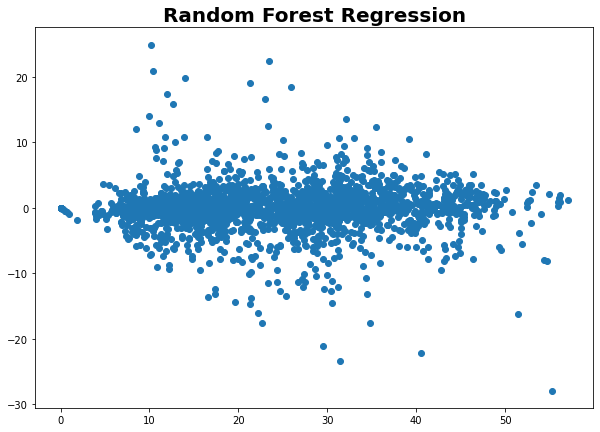

In [102]:
### Heteroscadacity
plt.figure(figsize=(10,7))
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.title("Random Forest Regression",fontsize= 20, fontweight='bold')

### **Feature Importances**

In [103]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

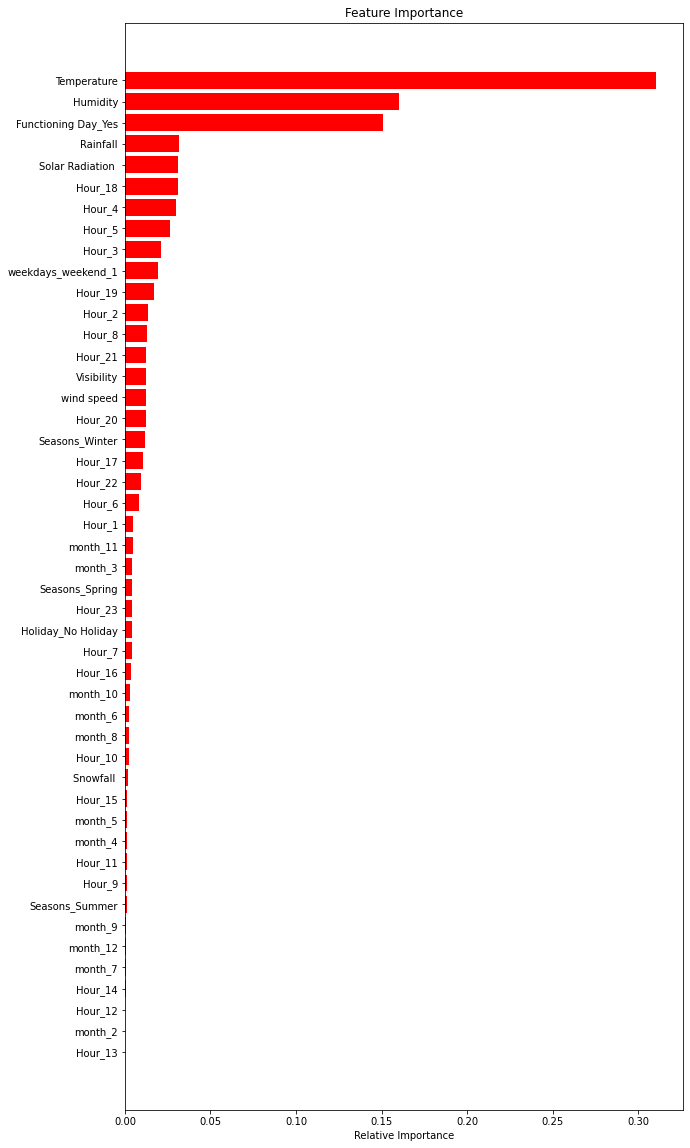

In [104]:
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


## **Comparing results of all the models**

In [105]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0         Linear regression   4.474  35.078  5.923     0.772   
             1          Lasso regression   4.960  41.480  6.441     0.731   
             2          Ridge regression   4.474  35.078  5.923     0.772   
             3  Dicision tree regression   4.547  37.575  6.130     0.756   
             4  Random forest regression   0.798   1.584  1.259     0.990   
Test set     0         Linear regression   4.410  33.275  5.768     0.789   
             1          Lasso regression   4.913  39.918  6.318     0.747   
             2          Ridge regression   4.410  33.277  5.769     0.789   
             3        Decision tree test   4.698  42.064  6.486     0.734   
             4  Random forest regression   2.209  12.771  3.574     0.919   

                Adjusted R2  
Training set 0         0.77  
             1         0.72  
             2         0.77  
             3         0.73  
             4         0.99  
Test set     0         0.78  
             1         0.74  
             2         0.78  
             3         0.73  
             4         0.92

# **Conclusion**

* **Peak hours for rented bikes are between 7AM and 9 AM in the morning and 5 PM to 7PM in the evening, which suggests that the bikes are rented mostly by office-going people.**

* **People preferred to rent bikes in the morning rather than in the evening.**

* **Demand for rented bikes is high during no-holiday and functioning days. Bike demand was high during spring, summer, and autumn due to the beautiful weather.**

* **When the rainfall was less, people would have booked more bikes, except in a few cases.**

* **The temperature, hours, and humidity are the most important features that positively drive the total rented bike count.**

* **We used different types of regression algorithms to train our model, like: linear regression, Linear Regression, Regularized linear regression (Ridge and Lasso), random forest regression, and decision tree ,where we tuned the parameters of the decision tree. Out Of them, random forest regression gave the best result.**